In [2]:
import praw
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
user_agent = "Scraper 1.0 by /u/python_engineer"
reddit = praw.Reddit (
client_id="Ubq_SKgCP89ldEjLbscUFA",
client_secret="QUPGtMpkSQQ0Doqpf2bz8GFF0ltHEw",
user_agent=user_agent
)

In [4]:
headlines = set ( )
for submission in reddit.subreddit('Investing').hot(limit=None):
 headlines.add(submission.title)
print(len(headlines))

338


In [5]:
print (submission.title)

Stock traiding at fair price


In [6]:
print (submission.id)

1c5x7cf


In [7]:
print (submission.author)

milmouzq


In [8]:
print (submission.score)
print (submission.upvote_ratio)
print (submission.url)

0
0.3
https://www.reddit.com/r/investing/comments/1c5x7cf/stock_traiding_at_fair_price/


In [9]:
df=pd.DataFrame(headlines)

In [10]:
df

,0
0,Website that offers charts of company's financ...
1,Volkswagen profit drops 20% in first quarter o...
2,Has anyone ever created a flowchart for where ...
3,How to safely and easily liquidate positions i...
4,Can my financial advisor share details about m...
...,...
333,Are EVs a bad investment right now?
334,How do we know Jim Simon's Medallion Fund retu...
335,Tried to create a back door Roth. Think I scr...
336,Negative shareholder equity vs high debt-to-eq...


In [11]:
# List of keywords to search for each cryptocurrency
keywords = ['Sui Coin', 'Solana Coin', 'Aptos Coin', 'BTC Coin', 'ETH Coin']

# Select the subreddit - you might want to adjust this depending on where you expect to find relevant posts
subreddit = reddit.subreddit('CryptoCurrency')

# Loop through each keyword and search posts
for keyword in keywords:
    print(f"Searching for recent posts about {keyword}:")
    # Use the search method with the 'new' parameter to get the most recent posts
    search_results = subreddit.search(keyword, sort='new', limit=None)  # Adjust limit as necessary

    for post in search_results:
        # Convert the timestamp to a readable format
        post_time = datetime.fromtimestamp(post.created_utc).strftime('%Y-%m-%d %H:%M:%S')
        print(f"Title: {post.title}")
        print(f"Time Posted: {post_time}")
        print(f"URL: {post.url}\n")

Searching for recent posts about Sui Coin:
Title: What's up with SUI and WorldCoin only having 6 and 7% of total supply unlocked?
Time Posted: 2023-09-02 21:39:01
URL: https://www.reddit.com/r/CryptoCurrency/comments/168bnvv/whats_up_with_sui_and_worldcoin_only_having_6_and/

Title: New cycle coins in the top 100
Time Posted: 2023-09-02 08:16:08
URL: https://www.reddit.com/r/CryptoCurrency/comments/167utla/new_cycle_coins_in_the_top_100/

Title: Token Unlock Worth $225 Million in September 2023: HBAR, APTOS, OP and more...
Time Posted: 2023-09-02 01:32:59
URL: https://www.reddit.com/r/CryptoCurrency/comments/167motq/token_unlock_worth_225_million_in_september_2023/

Title: Many of the top 100 coins will have huge dumps in circulating supply in the coming year, be aware of that before investing!
Time Posted: 2023-08-20 15:55:19
URL: https://www.reddit.com/r/CryptoCurrency/comments/15wc2i4/many_of_the_top_100_coins_will_have_huge_dumps_in/

Title: The Binance Effect Revisited: 2023 Editi

In [12]:
df=pd.DataFrame(search_results)

In [13]:
print(df)

Empty DataFrame
Columns: []
Index: []


In [15]:
start_date = datetime(2023, 4, 25)
end_date = datetime.now()

def get_posts(keyword):
    subreddit = reddit.subreddit("CryptoCurrencies")  # Searching across all subreddits
    search_results = subreddit.search(keyword, sort='new', limit=None)
    posts_data = []
    
    for post in search_results:
        post_time = datetime.fromtimestamp(post.created_utc)
        if start_date <= post_time <= end_date:
            try:
                # Fetching the poster's karma as a proxy for followers
                author_karma = post.author.link_karma + post.author.comment_karma
            except:
                author_karma = 'Unknown'
            posts_data.append([post.title, post_time.strftime('%Y-%m-%d %H:%M:%S'), post.url, author_karma])
    
    return posts_data

def save_to_csv(data, filename):
    df = pd.DataFrame(data, columns=['Title', 'Time Posted', 'URL', 'Author Karma'])
    df.to_csv(filename, index=False)

In [16]:
test_data=get_posts('BTC Coin')

In [54]:
test_data_csv=save_to_csv(test_data,"testing")

In [55]:
test_data_csv

In [56]:
test_data

[['Seeking Expert Insights: Evaluating Altcoins with low Market Cap – Key Criteria & Recommendations',
  '2024-03-01 17:46:54',
  'https://www.reddit.com/r/CryptoCurrencies/comments/1b3yxzf/seeking_expert_insights_evaluating_altcoins_with/',
  5442],
 ["Shower Thoughts on Monero's Future",
  '2024-02-20 10:19:45',
  'https://www.reddit.com/r/CryptoCurrencies/comments/1avdip9/shower_thoughts_on_moneros_future/',
  19072],
 ['Does Bitcoin ETF approval signals the Bull-run?',
  '2024-01-07 09:09:41',
  'https://www.reddit.com/r/CryptoCurrencies/comments/190ncye/does_bitcoin_etf_approval_signals_the_bullrun/',
  2743],
 ['[Question] Is anyone using crypto stocks like MSTR, META, COIN, etc, as a hedge against token volatility?',
  '2023-08-01 15:43:29',
  'https://www.reddit.com/r/CryptoCurrencies/comments/15fekvb/question_is_anyone_using_crypto_stocks_like_mstr/',
  1875],
 ['Dollar Stablecoins more important than Bitcoin in Countries with High Inflations $',
  '2023-07-29 18:26:05',
  'ht

In [57]:
subreddit_sui = reddit.subreddit('sui')

In [58]:
search_results_sui = subreddit.search(keyword, sort='new', limit=None)

In [59]:
print(search_results_sui)

In [60]:
print(len(search_results_sui))

TypeError: object of type 'ListingGenerator' has no len()

In [63]:
def fetch_posts(subreddit_name):
    subreddit = reddit.subreddit(subreddit_name)
    posts = {}

    # Fetch from 'new' and 'hot' without time filters
    for listing in [subreddit.new, subreddit.hot]:
        try:
            for post in listing(limit=None):  # No time_filter argument
                if post.id not in posts:
                    posts[post.id] = {
                        'title': post.title,
                        'score': post.score,
                        'url': post.url,
                        'created_utc': datetime.fromtimestamp(post.created_utc).strftime('%Y-%m-%d %H:%M:%S'),
                        'num_comments': post.num_comments,
                        'author': post.author.name if post.author else 'Deleted'
                    }
        except Exception as e:
            print(f"Failed to fetch from {listing.__name__}: {str(e)}")

    # Fetch from 'top' with time filters
    for time_filter in ['all', 'year', 'month', 'week', 'day']:
        try:
            for post in subreddit.top(limit=None, time_filter=time_filter):
                if post.id not in posts:
                    posts[post.id] = {
                        'title': post.title,
                        'score': post.score,
                        'url': post.url,
                        'created_utc': datetime.fromtimestamp(post.created_utc).strftime('%Y-%m-%d %H:%M:%S'),
                        'num_comments': post.num_comments,
                        'author': post.author.name if post.author else 'Deleted'
                    }
        except Exception as e:
            print(f"Failed to fetch from top with filter {time_filter}: {str(e)}")

    return posts.values()


In [64]:
data_sui=fetch_posts("sui")

In [65]:
data_sui

dict_values([{'title': 'my Suilend withdrawal did not show up in my wallet', 'score': 1, 'url': 'https://www.reddit.com/r/sui/comments/1ccazrq/my_suilend_withdrawal_did_not_show_up_in_my_wallet/', 'created_utc': '2024-04-24 23:01:57', 'num_comments': 3, 'author': 'Terrible_Dimension_8'}, {'title': 'XOCIETY - AAA pop shooter featuring RPG elements, dynamic PvP, and immersive PvE experiences, is coming to Sui', 'score': 2, 'url': 'https://venturebeat.com/games/ndus-interactive-teams-up-with-mysten-labs-to-make-sui-based-web3-game-xociety/', 'created_utc': '2024-04-24 18:16:28', 'num_comments': 0, 'author': 'mosaicRegressor'}, {'title': 'Transaction notifications', 'score': 1, 'url': 'https://www.reddit.com/r/sui/comments/1cbnu4d/transaction_notifications/', 'created_utc': '2024-04-24 04:02:01', 'num_comments': 2, 'author': 'CassiusBotdorf'}, {'title': 'SuiWallet: unable to select from multiple accounts', 'score': 1, 'url': 'https://www.reddit.com/r/sui/comments/1cb5taw/suiwallet_unable_t

Searching in subreddit CryptoCurrency for recent posts about Bitcoin:
Searching in subreddit CryptoCurrency for recent posts about BTC:
Searching in subreddit CryptoCurrency for recent posts about Ethereum:
Searching in subreddit CryptoCurrency for recent posts about ETH:
Searching in subreddit CryptoCurrency for recent posts about Tether:
Searching in subreddit CryptoCurrency for recent posts about USDT:
Searching in subreddit CryptoCurrency for recent posts about BNB:
Searching in subreddit CryptoCurrency for recent posts about Solana:
Searching in subreddit CryptoCurrency for recent posts about SOL:
Searching in subreddit CryptoCurrency for recent posts about USDC:
Searching in subreddit CryptoCurrency for recent posts about XRP:
Searching in subreddit CryptoCurrency for recent posts about Dogecoin:
Searching in subreddit CryptoCurrency for recent posts about DOGE:
Searching in subreddit CryptoCurrency for recent posts about Toncoin:
Searching in subreddit CryptoCurrency for recent 

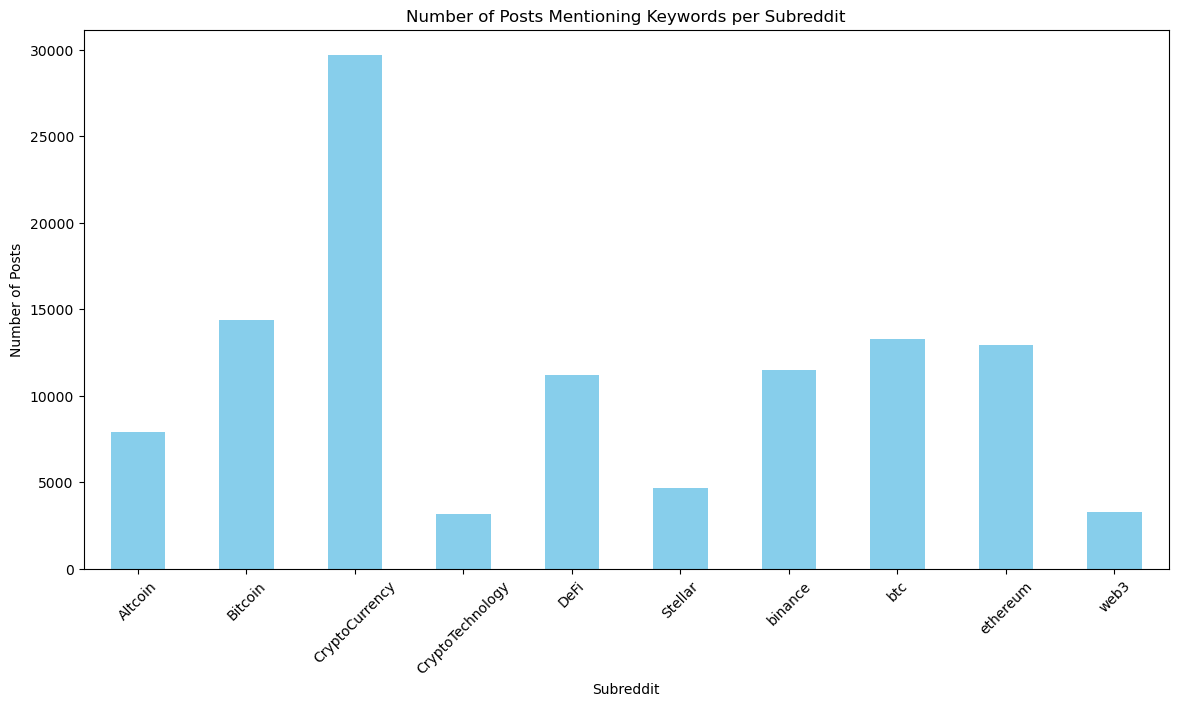

In [17]:
# List of keywords to search for each cryptocurrency
keywords = [
    'Bitcoin', 'BTC', 'Ethereum', 'ETH', 'Tether', 'USDT', 'BNB', 'Solana', 'SOL', 
    'USDC', 'XRP', 'Dogecoin', 'DOGE', 'Toncoin', 'TON', 'Cardano', 'ADA', 'Shiba Inu', 'SHIB', 
    'Avalanche', 'AVAX', 'TRON', 'TRX', 'Polkadot', 'DOT', 'Bitcoin Cash', 'BCH', 'Chainlink', 'LINK', 
    'NEAR Protocol', 'NEAR', 'Polygon', 'MATIC', 'Internet Computer', 'ICP', 'Litecoin', 'LTC', 'UNUS SED LEO', 'LEO', 
    'Dai', 'DAI', 'Uniswap', 'UNI', 'First Digital USD', 'FDUSD', 'Hedera', 'HBAR', 'Stacks', 'STX', 
    'Aptos', 'APT', 'Ethereum Classic', 'ETC', 'Mantle', 'MNT', 'Cronos', 'CRO', 'Pepe', 'PEPE', 
    'Stellar', 'XLM', 'Cosmos', 'ATOM', 'Render', 'RNDR', 'Filecoin', 'FIL', 'dogwifhat', 'WIF', 
    'OKB', 'Immutable', 'IMX', 'VeChain', 'VET', 'Arbitrum', 'ARB', 'Kaspa', 'KAS', 'Maker', 'MKR', 
    'The Graph', 'GRT', 'Optimism', 'OP', 'Injective', 'INJ', 'Theta Network', 'THETA', 'Monero', 'XMR', 
    'Fantom', 'FTM', 'Core', 'CORE', 'Arweave', 'AR', 'Fetch.ai', 'FET', 'Celestia', 'TIA', 'Bonk', 'BONK', 
    'THORChain', 'RUNE', 'FLOKI', 'Lido DAO', 'LDO', 'Sei', 'SEI', 'Bitget Token', 'BGB', 'Algorand', 'ALGO', 
    'Sui', 'Beam', 'BEAM', 'Gala', 'GALA', 'Pendle', 'PENDLE', 'Jupiter', 'JUP', 'Flow', 'FLOW', 
    'Aave', 'AAVE', 'Quant', 'QNT', 'Bitcoin SV', 'BSV', 'Ethena', 'ENA', 'Neo', 'NEO', 'BitTorrent', 'New', 'BTT', 
    'SingularityNET', 'AGIX', 'Flare', 'FLR', 'Wormhole', 'W', 'Ondo', 'ONDO', 'MultiversX', 'EGLD', 
    'Akash Network', 'AKT', 'Chiliz', 'CHZ', 'Axie Infinity', 'AXS', 'The Sandbox', 'SAND', 'dYdX', 'Native', 'DYDX', 
    'eCash', 'XEC', 'Conflux', 'CFX', 'Tezos', 'XTZ'
]

# Subreddits from your provided list plus a few previously included
subreddits = [
    'CryptoCurrency', 'Bitcoin', 'ethereum', 
    'CryptoTechnology', 'btc', 'binance','web3', 
    'DeFi', 'Altcoin', 'Stellar']


# Define an empty list to collect all post data
posts_data = []

# Loop through each subreddit and each keyword
for subreddit_name in subreddits:
    subreddit = reddit.subreddit(subreddit_name)  # Access the subreddit
    for keyword in keywords:
        print(f"Searching in subreddit {subreddit_name} for recent posts about {keyword}:")
        search_results = subreddit.search(keyword, sort='new', limit=None)  # Adjust limit as necessary

        for post in search_results:
            post_time = datetime.fromtimestamp(post.created_utc).strftime('%Y-%m-%d %H:%M:%S')
            post_data = {
                'subreddit': subreddit_name,
                'keyword': keyword,
                'title': post.title,
                'text': post.selftext,
                'time_posted': post_time,
                'url': post.url,
                'number_of_comments': post.num_comments,
                'score': post.score,
                'author': post.author.name if post.author else 'Deleted'
            }
            posts_data.append(post_data)

# Create a DataFrame from the collected data
df = pd.DataFrame(posts_data)

# Display the total number of posts collected
print(f"Total number of posts collected: {len(posts_data)}")

post_counts = df.groupby('subreddit')['keyword'].count()
post_counts.plot(kind='bar', figsize=(14, 7), color='skyblue')
plt.title('Number of Posts Mentioning Keywords per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()

In [15]:
posts_data

[{'subreddit': 'CryptoCurrency',
  'keyword': 'Bitcoin',
  'title': 'About the Bitcoin halving.... ',
  'time_posted': '2024-04-25 18:51:17',
  'url': 'https://www.reddit.com/r/CryptoCurrency/comments/1ccxjz5/about_the_bitcoin_halving/',
  'number_of_comments': 50,
  'score': 0,
  'author': 'Accomplished-Map1727'},
 {'subreddit': 'CryptoCurrency',
  'keyword': 'Bitcoin',
  'title': "If Crypto Threatens the Establishment, Why Haven't They Crushed It?",
  'time_posted': '2024-04-25 17:31:08',
  'url': 'https://www.reddit.com/r/CryptoCurrency/comments/1ccwftj/if_crypto_threatens_the_establishment_why_havent/',
  'number_of_comments': 80,
  'score': 0,
  'author': 'ImprovementJolly3711'},
 {'subreddit': 'CryptoCurrency',
  'keyword': 'Bitcoin',
  'title': "✨ Elon Musk starts selling Tesla's #Bitcoin, exactly 3 years ago. Since then, he's missed out on $1.2 BILLION in gains 🤡",
  'time_posted': '2024-04-25 13:32:00',
  'url': 'https://i.redd.it/unw1u55ldmwc1.png',
  'number_of_comments': 64

In [16]:
df = pd.DataFrame(posts_data)

In [17]:
df

,subreddit,keyword,title,time_posted,url,number_of_comments,score,author
0,CryptoCurrency,Bitcoin,About the Bitcoin halving....,2024-04-25 18:51:17,https://www.reddit.com/r/CryptoCurrency/commen...,50,0,Accomplished-Map1727
1,CryptoCurrency,Bitcoin,"If Crypto Threatens the Establishment, Why Hav...",2024-04-25 17:31:08,https://www.reddit.com/r/CryptoCurrency/commen...,80,0,ImprovementJolly3711
2,CryptoCurrency,Bitcoin,"✨ Elon Musk starts selling Tesla's #Bitcoin, e...",2024-04-25 13:32:00,https://i.redd.it/unw1u55ldmwc1.png,64,0,rizzobitcoin
3,CryptoCurrency,Bitcoin,Arthur Hayes Predicts Bitcoin Surge Amid Globa...,2024-04-25 12:39:42,https://cryptotale.org/bitmex-co-founder-predi...,32,74,OcelotWarm8822
4,CryptoCurrency,Bitcoin,Bitcoin Price Prediction Analysis Post-Halving,2024-04-25 09:26:28,https://www.reddit.com/r/CryptoCurrency/commen...,27,15,nakasatoshi
...,...,...,...,...,...,...,...,...
111938,Stellar,Tezos,Custodian Anchorage adds support for Tezos and...,2019-08-21 20:28:39,https://www.theblockcrypto.com/tiny/custodian-...,1,10,kehaar
111939,Stellar,Tezos,"Ethereum, Tezos, Stellar Foundations back a ha...",2019-07-26 15:06:21,https://www.theblockcrypto.com/tiny/ethereum-t...,1,18,kehaar
111940,Stellar,Tezos,What Stellar can learn from Tezos.,2017-12-31 06:42:39,https://medium.com/@benchi10/tezos-a-lesson-fo...,0,3,mbenchi
111941,Stellar,Tezos,HODL alert #3: Conclusions from the Mobius AMA...,2017-11-21 19:20:22,https://www.reddit.com/r/Stellar/comments/7ejw...,54,68,chargingerman


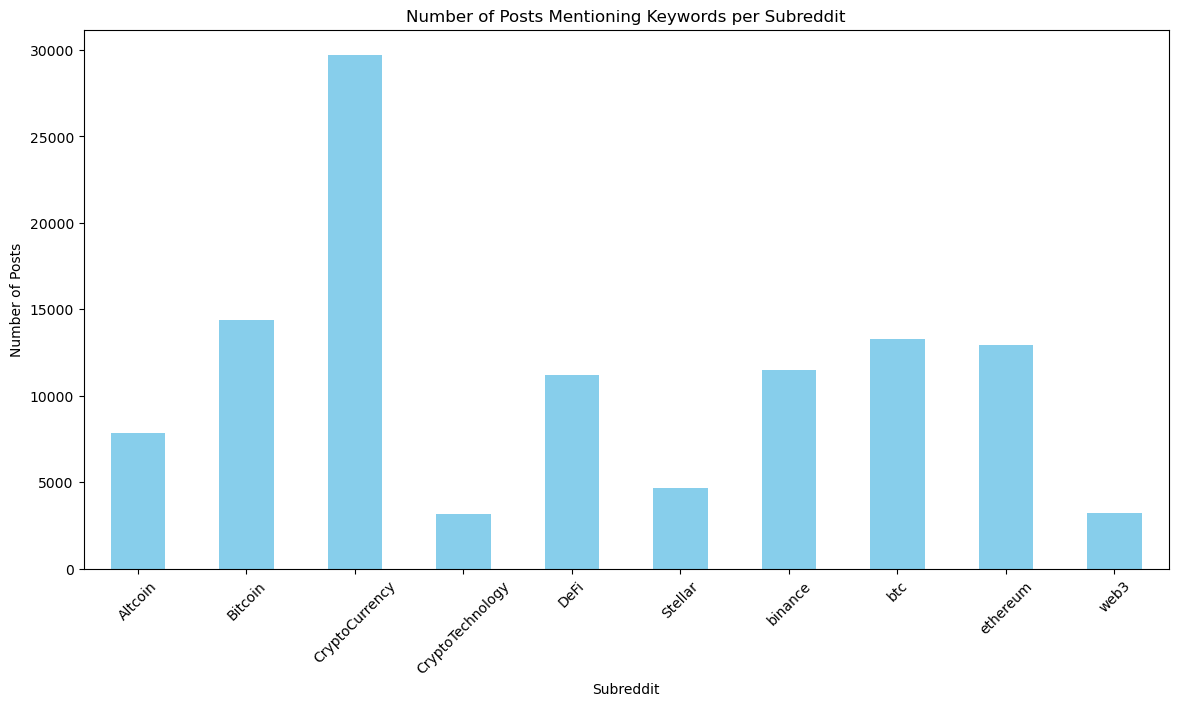

In [20]:
post_counts = df.groupby('subreddit')['keyword'].count()
post_counts.plot(kind='bar', figsize=(14, 7), color='skyblue')
plt.title('Number of Posts Mentioning Keywords per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()


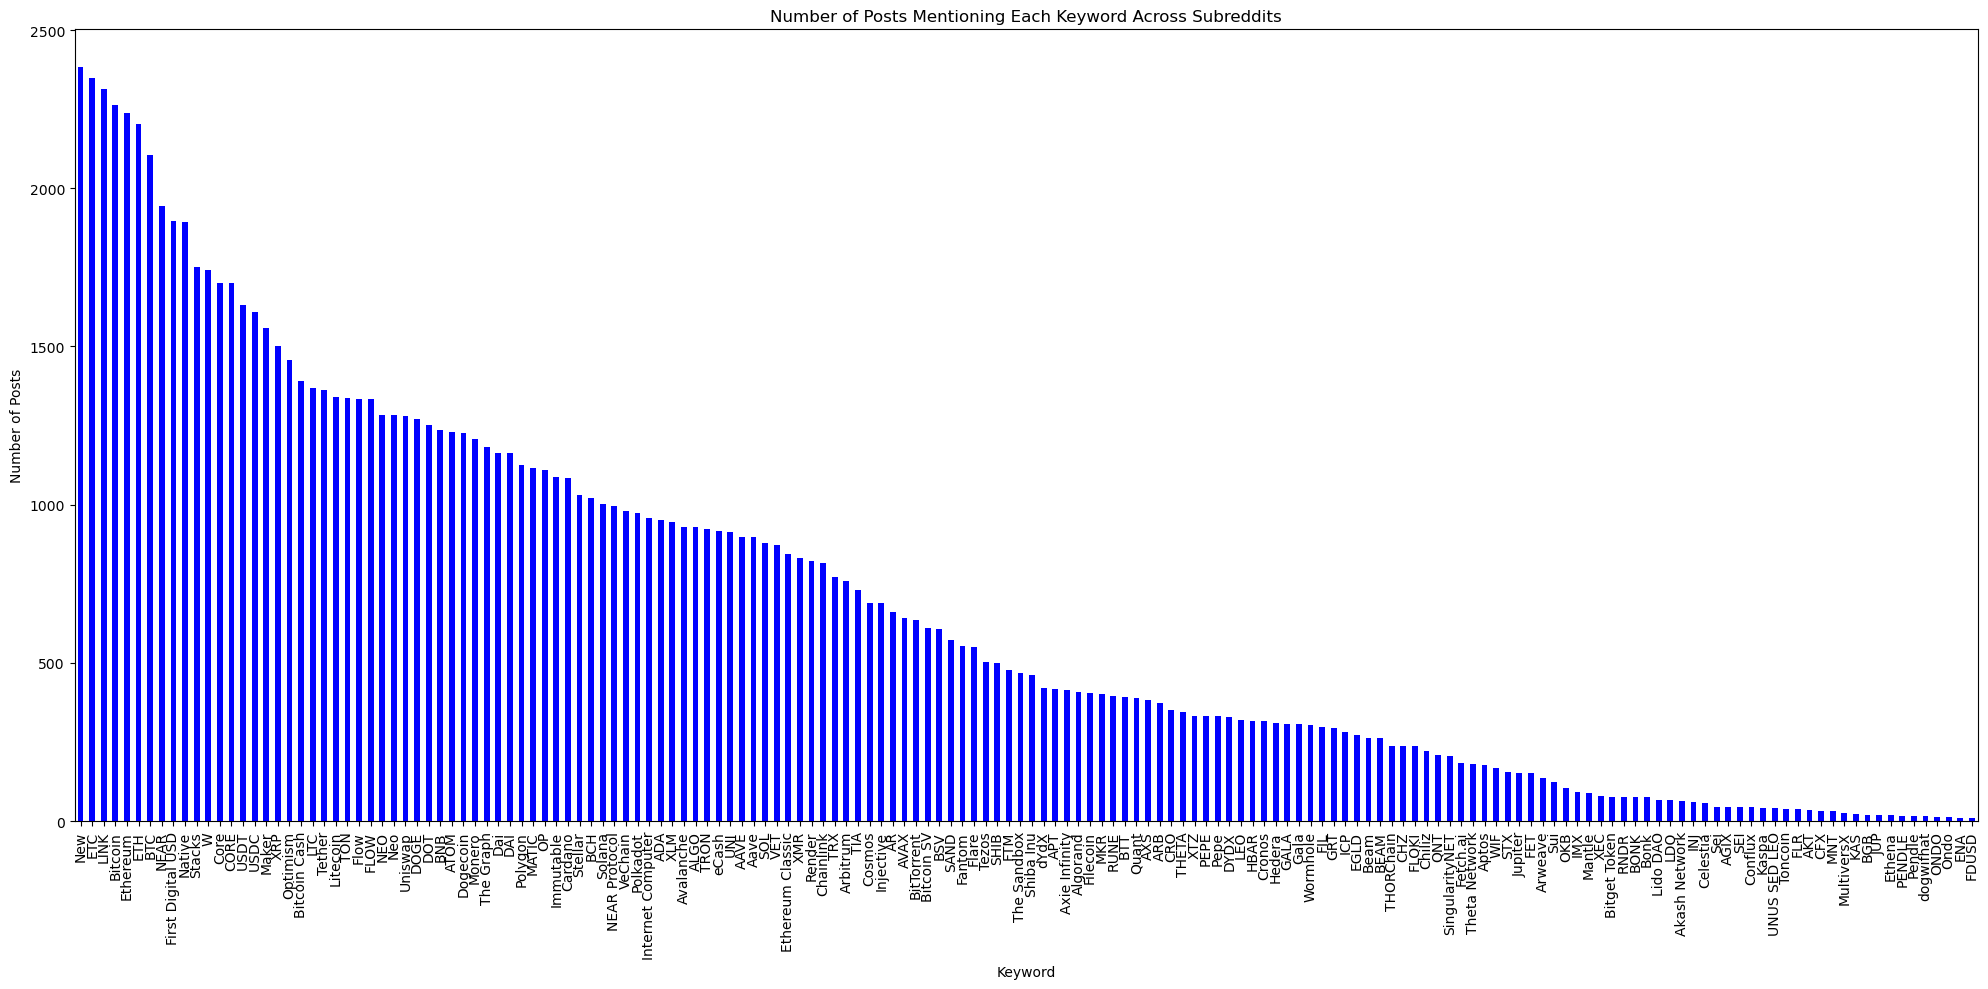

In [21]:
keyword_counts = df.groupby('keyword').size().sort_values(ascending=False)
keyword_counts.plot(kind='bar', figsize=(20, 10), color='blue')
plt.title('Number of Posts Mentioning Each Keyword Across Subreddits')
plt.xlabel('Keyword')
plt.ylabel('Number of Posts')
plt.xticks(rotation=90)  # Rotate labels to improve readability
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

Searching in subreddit dogecoin for recent posts about Bitcoin:
Searching in subreddit dogecoin for recent posts about BTC:
Searching in subreddit dogecoin for recent posts about Ethereum:
Searching in subreddit dogecoin for recent posts about ETH:
Searching in subreddit dogecoin for recent posts about Tether:
Searching in subreddit dogecoin for recent posts about USDT:
Searching in subreddit dogecoin for recent posts about BNB:
Searching in subreddit dogecoin for recent posts about Solana:
Searching in subreddit dogecoin for recent posts about SOL:
Searching in subreddit dogecoin for recent posts about USDC:
Searching in subreddit dogecoin for recent posts about XRP:
Searching in subreddit dogecoin for recent posts about Dogecoin:
Searching in subreddit dogecoin for recent posts about DOGE:
Searching in subreddit dogecoin for recent posts about Cardano:
Searching in subreddit dogecoin for recent posts about ADA:
Searching in subreddit dogecoin for recent posts about Shiba Inu:
Searchi

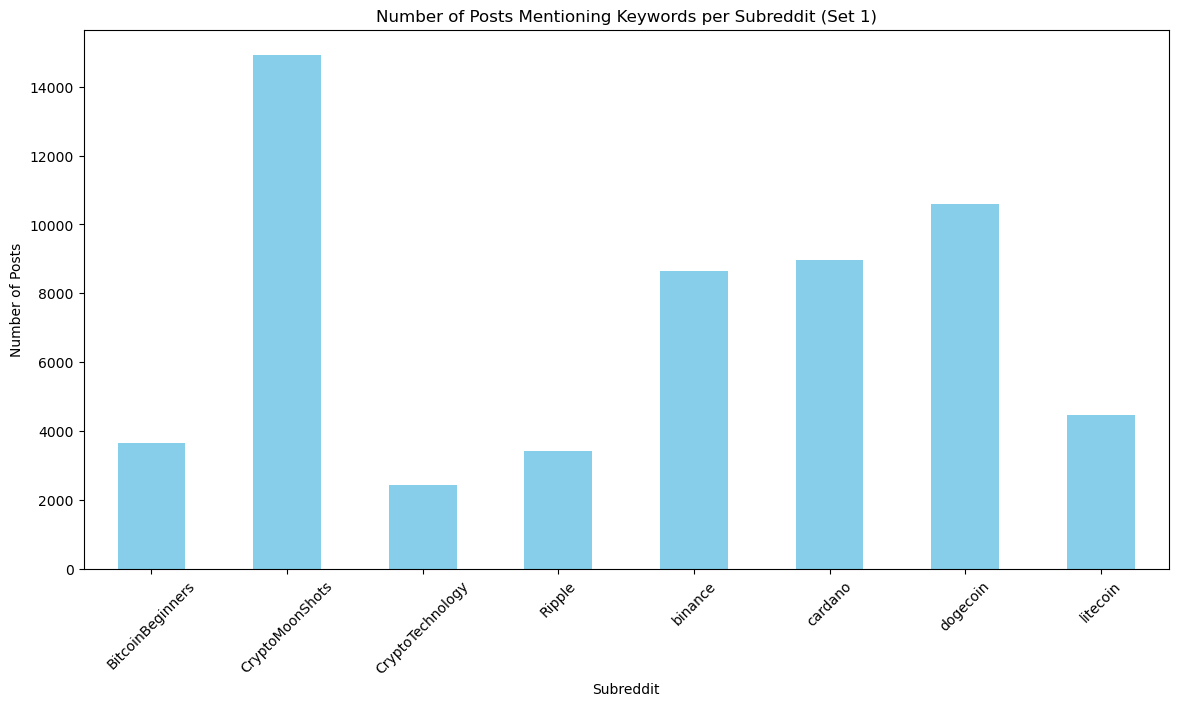

In [21]:
keywords = [
    'Bitcoin', 'BTC', 'Ethereum', 'ETH', 'Tether', 'USDT', 'BNB', 'Solana', 'SOL',
    'USDC', 'XRP', 'Dogecoin', 'DOGE', 'Cardano', 'ADA', 'Shiba Inu', 'SHIB',
    'Avalanche', 'AVAX', 'TRON', 'TRX', 'Polkadot', 'DOT', 'Bitcoin Cash', 'BCH', 'Chainlink', 'LINK',
    'NEAR Protocol', 'NEAR', 'Polygon', 'MATIC', 'Internet Computer', 'ICP', 'Litecoin',
    'Dai', 'DAI', 'Uniswap', 'UNI',
    'Aptos', 'APT', 'Ethereum Classic', 'ETC', 'Mantle', 'MNT', 'Cronos', 'CRO', 'Pepe', 'PEPE',
    'Stellar', 'XLM', 'Cosmos', 'ATOM', 'Render', 'RNDR', 'Filecoin', 'FIL', 'dogwifhat', 'WIF',
    'OKB', 'Immutable', 'IMX', 'VeChain', 'VET', 'Arbitrum', 'ARB', 'Maker', 'MKR',
    'The Graph', 'GRT', 'Optimism', 'OP', 'Injective', 'INJ', 'Theta Network', 'THETA', 'Monero', 'XMR',
    'Fantom', 'FTM', 'Core', 'CORE', 'Arweave', 'AR', 'Fetch.ai', 'FET', 'Celestia', 'TIA', 'Bonk', 'BONK',
    'THORChain', 'RUNE', 'FLOKI', 'Lido DAO', 'LDO', 'Sei', 'SEI', 'Bitget Token', 'BGB', 'Algorand', 'ALGO',
    'Sui'
]

subreddits_1 = [
     'dogecoin', 'CryptoMoonShots', 
    'CryptoTechnology', 'BitcoinBeginners', 'binance', 'cardano', 'Ripple', 
    'litecoin'
]

# Define an empty list to collect data specifically for the first set of subreddits
posts_data_1 = []

# Loop through each subreddit in subreddits_1 and each keyword
for subreddit_name in subreddits_1:
    subreddit = reddit.subreddit(subreddit_name)  # Access the subreddit
    for keyword in keywords:
        print(f"Searching in subreddit {subreddit_name} for recent posts about {keyword}:")
        search_results = subreddit.search(keyword, sort='new', limit=None)  # Adjust limit as necessary

        for post in search_results:
            post_time = datetime.fromtimestamp(post.created_utc).strftime('%Y-%m-%d %H:%M:%S')
            post_data = {
                'subreddit': subreddit_name,
                'keyword': keyword,
                'title': post.title,
                'text': post.selftext,
                'time_posted': post_time,
                'url': post.url,
                'number_of_comments': post.num_comments,
                'score': post.score,
                'author': post.author.name if post.author else 'Deleted'
            }
            posts_data_1.append(post_data)

# Create a DataFrame from the collected data for the first set
df_1 = pd.DataFrame(posts_data_1)

# Display the total number of posts collected for the first set
print(f"Total number of posts collected from set 1: {len(posts_data_1)}")

# Plot the number of posts per subreddit from the first set
post_counts_1 = df_1.groupby('subreddit')['keyword'].count()
post_counts_1.plot(kind='bar', figsize=(14, 7), color='skyblue')
plt.title('Number of Posts Mentioning Keywords per Subreddit (Set 1)')
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()

Searching in subreddit cryptocurrencymemes for recent posts about Bitcoin:
Searching in subreddit cryptocurrencymemes for recent posts about BTC:
Searching in subreddit cryptocurrencymemes for recent posts about Ethereum:
Searching in subreddit cryptocurrencymemes for recent posts about ETH:
Searching in subreddit cryptocurrencymemes for recent posts about Tether:
Searching in subreddit cryptocurrencymemes for recent posts about USDT:
Searching in subreddit cryptocurrencymemes for recent posts about BNB:
Searching in subreddit cryptocurrencymemes for recent posts about Solana:
Searching in subreddit cryptocurrencymemes for recent posts about SOL:
Searching in subreddit cryptocurrencymemes for recent posts about USDC:
Searching in subreddit cryptocurrencymemes for recent posts about XRP:
Searching in subreddit cryptocurrencymemes for recent posts about Dogecoin:
Searching in subreddit cryptocurrencymemes for recent posts about DOGE:
Searching in subreddit cryptocurrencymemes for recent 

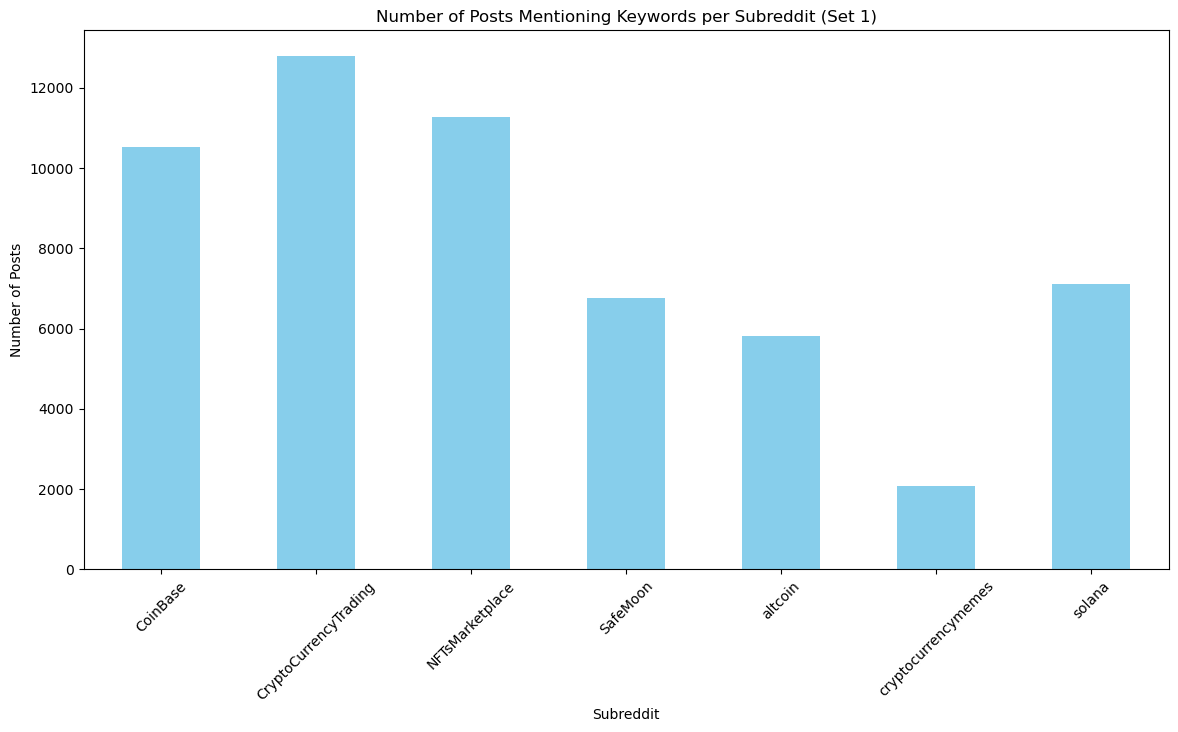

In [22]:
keywords = [
    'Bitcoin', 'BTC', 'Ethereum', 'ETH', 'Tether', 'USDT', 'BNB', 'Solana', 'SOL',
    'USDC', 'XRP', 'Dogecoin', 'DOGE', 'Cardano', 'ADA', 'Shiba Inu', 'SHIB',
    'Avalanche', 'AVAX', 'TRON', 'TRX', 'Polkadot', 'DOT', 'Bitcoin Cash', 'BCH', 'Chainlink', 'LINK',
    'NEAR Protocol', 'NEAR', 'Polygon', 'MATIC', 'Internet Computer', 'ICP', 'Litecoin',
    'Dai', 'DAI', 'Uniswap', 'UNI',
    'Aptos', 'APT', 'Ethereum Classic', 'ETC', 'Mantle', 'MNT', 'Cronos', 'CRO', 'Pepe', 'PEPE',
    'Stellar', 'XLM', 'Cosmos', 'ATOM', 'Render', 'RNDR', 'Filecoin', 'FIL', 'dogwifhat', 'WIF',
    'OKB', 'Immutable', 'IMX', 'VeChain', 'VET', 'Arbitrum', 'ARB', 'Maker', 'MKR',
    'The Graph', 'GRT', 'Optimism', 'OP', 'Injective', 'INJ', 'Theta Network', 'THETA', 'Monero', 'XMR',
    'Fantom', 'FTM', 'Core', 'CORE', 'Arweave', 'AR', 'Fetch.ai', 'FET', 'Celestia', 'TIA', 'Bonk', 'BONK',
    'THORChain', 'RUNE', 'FLOKI', 'Lido DAO', 'LDO', 'Sei', 'SEI', 'Bitget Token', 'BGB', 'Algorand', 'ALGO',
    'Sui'
]

subreddits_2 = [
    'cryptocurrencymemes', 'SafeMoon', 'NFTsMarketplace', 'CoinBase', 'altcoin', 'CryptoCurrencyTrading', 'solana'
]

# Define an empty list to collect data specifically for the first set of subreddits
posts_data_2 = []

# Loop through each subreddit in subreddits_1 and each keyword
for subreddit_name in subreddits_2:
    subreddit = reddit.subreddit(subreddit_name)  # Access the subreddit
    for keyword in keywords:
        print(f"Searching in subreddit {subreddit_name} for recent posts about {keyword}:")
        search_results = subreddit.search(keyword, sort='new', limit=None)  # Adjust limit as necessary

        for post in search_results:
            post_time = datetime.fromtimestamp(post.created_utc).strftime('%Y-%m-%d %H:%M:%S')
            post_data = {
                'subreddit': subreddit_name,
                'keyword': keyword,
                'title': post.title,
                'text': post.selftext,
                'time_posted': post_time,
                'url': post.url,
                'number_of_comments': post.num_comments,
                'score': post.score,
                'author': post.author.name if post.author else 'Deleted'
            }
            posts_data_2.append(post_data)

# Create a DataFrame from the collected data for the first set
df_2 = pd.DataFrame(posts_data_2)

# Display the total number of posts collected for the first set
print(f"Total number of posts collected from set 1: {len(posts_data_2)}")

# Plot the number of posts per subreddit from the first set
post_counts_2 = df_2.groupby('subreddit')['keyword'].count()
post_counts_2.plot(kind='bar', figsize=(14, 7), color='skyblue')
plt.title('Number of Posts Mentioning Keywords per Subreddit (Set 1)')
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()

Searching in subreddit decentraland for recent posts about Bitcoin:
Searching in subreddit decentraland for recent posts about BTC:
Searching in subreddit decentraland for recent posts about Ethereum:
Searching in subreddit decentraland for recent posts about ETH:
Searching in subreddit decentraland for recent posts about Tether:
Searching in subreddit decentraland for recent posts about USDT:
Searching in subreddit decentraland for recent posts about BNB:
Searching in subreddit decentraland for recent posts about Solana:
Searching in subreddit decentraland for recent posts about SOL:
Searching in subreddit decentraland for recent posts about USDC:
Searching in subreddit decentraland for recent posts about XRP:
Searching in subreddit decentraland for recent posts about Dogecoin:
Searching in subreddit decentraland for recent posts about DOGE:
Searching in subreddit decentraland for recent posts about Cardano:
Searching in subreddit decentraland for recent posts about ADA:
Searching in 

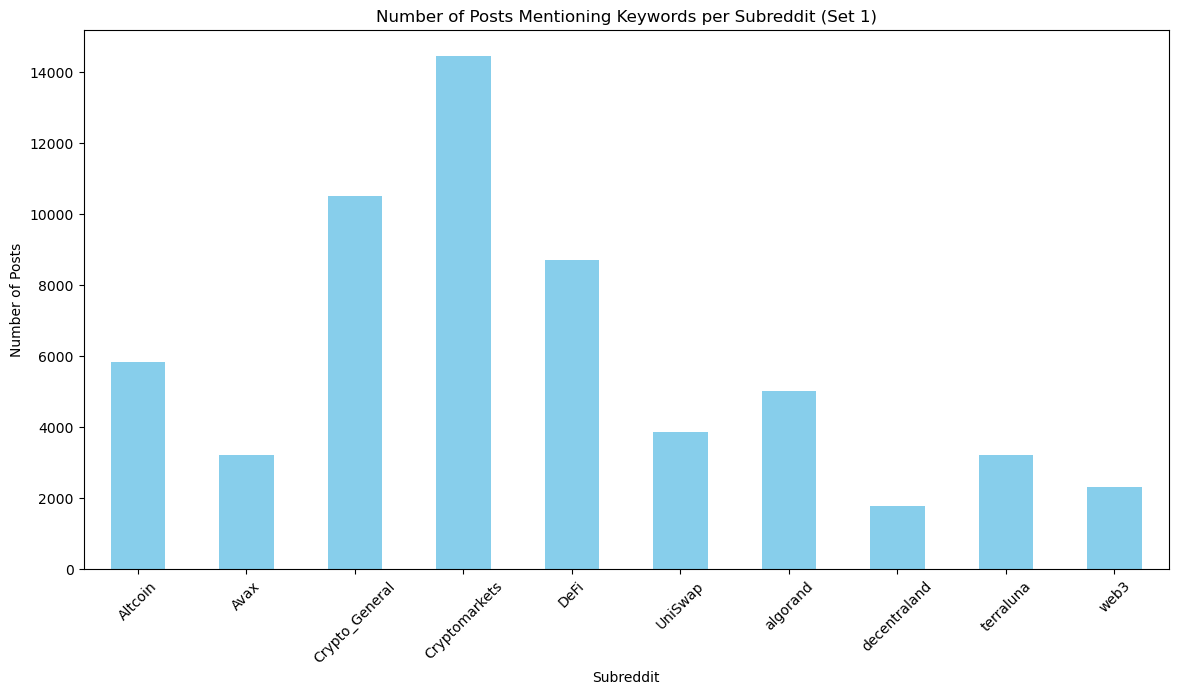

In [23]:
keywords = [
    'Bitcoin', 'BTC', 'Ethereum', 'ETH', 'Tether', 'USDT', 'BNB', 'Solana', 'SOL',
    'USDC', 'XRP', 'Dogecoin', 'DOGE', 'Cardano', 'ADA', 'Shiba Inu', 'SHIB',
    'Avalanche', 'AVAX', 'TRON', 'TRX', 'Polkadot', 'DOT', 'Bitcoin Cash', 'BCH', 'Chainlink', 'LINK',
    'NEAR Protocol', 'NEAR', 'Polygon', 'MATIC', 'Internet Computer', 'ICP', 'Litecoin',
    'Dai', 'DAI', 'Uniswap', 'UNI',
    'Aptos', 'APT', 'Ethereum Classic', 'ETC', 'Mantle', 'MNT', 'Cronos', 'CRO', 'Pepe', 'PEPE',
    'Stellar', 'XLM', 'Cosmos', 'ATOM', 'Render', 'RNDR', 'Filecoin', 'FIL', 'dogwifhat', 'WIF',
    'OKB', 'Immutable', 'IMX', 'VeChain', 'VET', 'Arbitrum', 'ARB', 'Maker', 'MKR',
    'The Graph', 'GRT', 'Optimism', 'OP', 'Injective', 'INJ', 'Theta Network', 'THETA', 'Monero', 'XMR',
    'Fantom', 'FTM', 'Core', 'CORE', 'Arweave', 'AR', 'Fetch.ai', 'FET', 'Celestia', 'TIA', 'Bonk', 'BONK',
    'THORChain', 'RUNE', 'FLOKI', 'Lido DAO', 'LDO', 'Sei', 'SEI', 'Bitget Token', 'BGB', 'Algorand', 'ALGO',
    'Sui'
]

subreddits_3 = [
    'decentraland', 'terraluna', 'algorand', 'Crypto_General', 'UniSwap', 'Avax', 'web3',
    'DeFi', 'Cryptomarkets', 'Altcoin'
]

# Define an empty list to collect data specifically for the first set of subreddits
posts_data_3 = []

# Loop through each subreddit in subreddits_1 and each keyword
for subreddit_name in subreddits_3:
    subreddit = reddit.subreddit(subreddit_name)  # Access the subreddit
    for keyword in keywords:
        print(f"Searching in subreddit {subreddit_name} for recent posts about {keyword}:")
        search_results = subreddit.search(keyword, sort='new', limit=None)  # Adjust limit as necessary

        for post in search_results:
            post_time = datetime.fromtimestamp(post.created_utc).strftime('%Y-%m-%d %H:%M:%S')
            post_data = {
                'subreddit': subreddit_name,
                'keyword': keyword,
                'title': post.title,
                'text': post.selftext,
                'time_posted': post_time,
                'url': post.url,
                'number_of_comments': post.num_comments,
                'score': post.score,
                'author': post.author.name if post.author else 'Deleted'
            }
            posts_data_3.append(post_data)

# Create a DataFrame from the collected data for the first set
df_3 = pd.DataFrame(posts_data_3)

# Display the total number of posts collected for the first set
print(f"Total number of posts collected from set 1: {len(posts_data_3)}")

# Plot the number of posts per subreddit from the first set
post_counts_3 = df_3.groupby('subreddit')['keyword'].count()
post_counts_3.plot(kind='bar', figsize=(14, 7), color='skyblue')
plt.title('Number of Posts Mentioning Keywords per Subreddit (Set 1)')
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()

In [24]:
df_1 = pd.DataFrame(posts_data_1)

Total number of posts collected from set 1: 194146


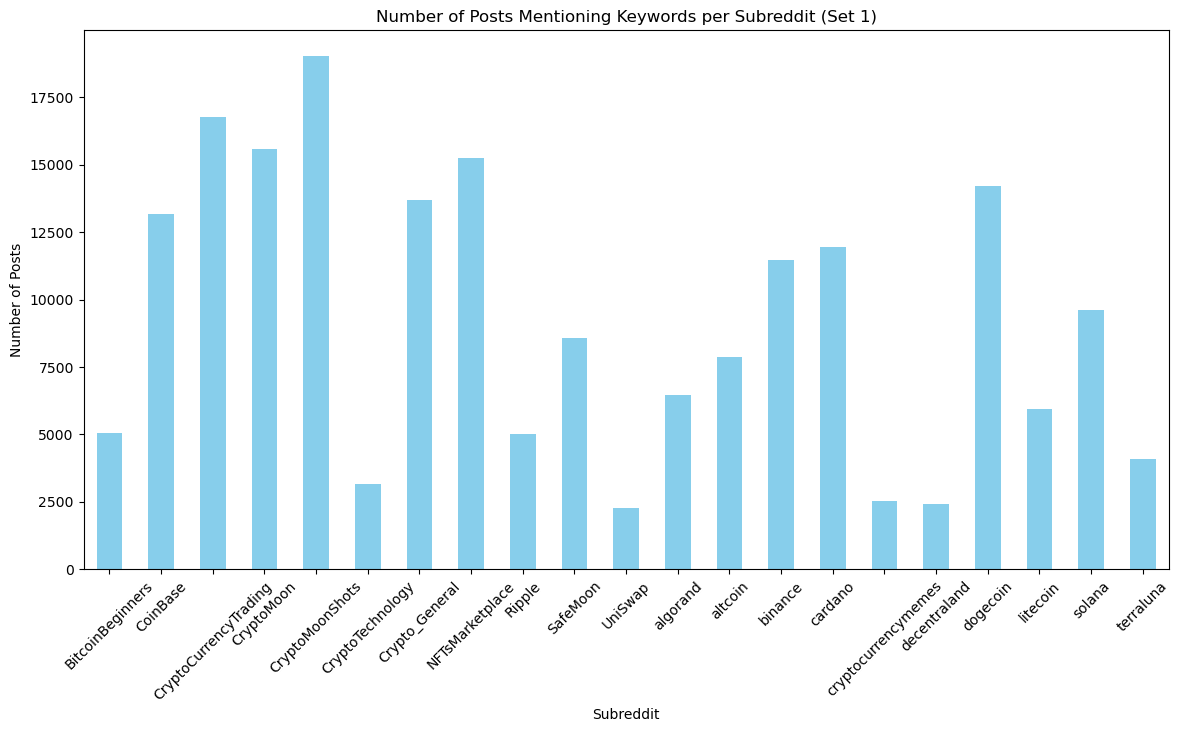

In [25]:
print(f"Total number of posts collected from set 1: {len(posts_data_1)}")

# Plot the number of posts per subreddit from the first set
post_counts_1 = df_1.groupby('subreddit')['keyword'].count()
post_counts_1.plot(kind='bar', figsize=(14, 7), color='skyblue')
plt.title('Number of Posts Mentioning Keywords per Subreddit (Set 1)')
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()

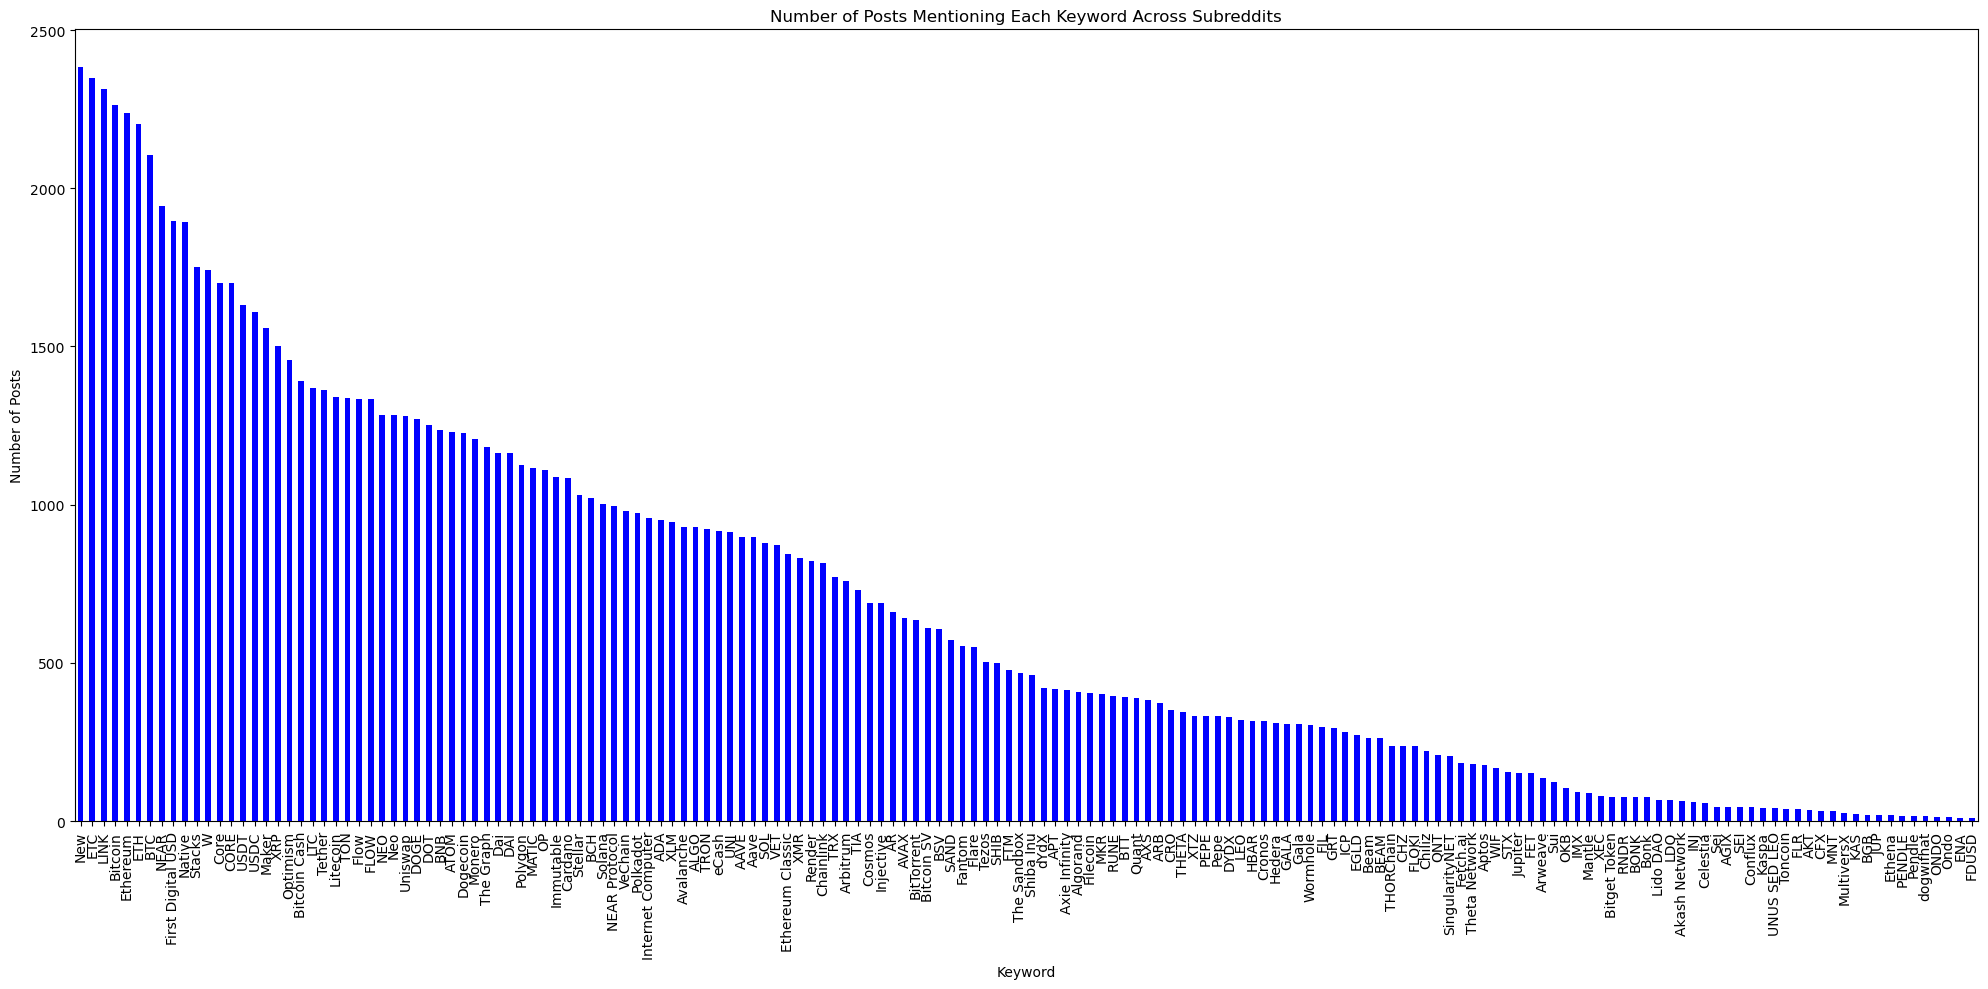

In [26]:
keyword_counts = df.groupby('keyword').size().sort_values(ascending=False)
keyword_counts.plot(kind='bar', figsize=(20, 10), color='blue')
plt.title('Number of Posts Mentioning Each Keyword Across Subreddits')
plt.xlabel('Keyword')
plt.ylabel('Number of Posts')
plt.xticks(rotation=90)  # Rotate labels to improve readability
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

In [24]:
# Assuming df_1 and df are already defined as mentioned

# Filter out the rows where the keyword is 'New'
df_3_filtered = df_3[~df_3['keyword'].str.contains('New', case=False, na=False)]
df_2_filtered = df_2[~df_2['keyword'].str.contains('New', case=False, na=False)]
df_1_filtered = df_1[~df_1['keyword'].str.contains('New', case=False, na=False)]
df_filtered = df[~df['keyword'].str.contains('New', case=False, na=False)]

# Path to save CSV files on your Desktop
# Make sure to replace 'YourUsername' with your actual username
# For Windows
path_df_3_filtered = "data/df_3_filtered.csv"
path_df_2_filtered = "data/df_2_filtered.csv"
path_df_1_filtered = "data/df_1_filtered.csv"
path_df_filtered = 'data/df_filtered.csv'


In [28]:
df_1_filtered

,subreddit,keyword,title,time_posted,url,number_of_comments,score,author
0,dogecoin,Bitcoin,Market cap for dummies,2024-04-25 04:59:35,https://i.redd.it/kn1nzr89ujwc1.jpeg,2,9,Her6our6
1,dogecoin,Bitcoin,The Best ever,2024-04-24 22:43:44,https://i.redd.it/31zc6qb7zhwc1.jpeg,22,105,Her6our6
2,dogecoin,Bitcoin,What aren’t I rich yet?,2024-04-20 01:18:04,https://www.reddit.com/r/dogecoin/comments/1c8...,67,64,No_Philosophy_3622
3,dogecoin,Bitcoin,Bitcoin day today.. Doge day tomorrow.. feliz ...,2024-04-19 08:41:39,https://www.reddit.com/r/dogecoin/comments/1c7...,4,10,voterosticon
4,dogecoin,Bitcoin,Maybe if we’re lucky the charts will stay para...,2024-04-18 00:05:12,https://i.redd.it/7qwn88rcf4vc1.jpeg,9,46,Hi_im_terry91
...,...,...,...,...,...,...,...,...
194141,UniSwap,LTC,the best sites to earn some free crypto,2022-06-10 21:02:03,https://www.reddit.com/r/UniSwap/comments/v9g8...,7,0,france9999
194142,UniSwap,LTC,RastaSwap ICO - #1 Crypto Cannabis Ecosystem a...,2022-04-13 15:32:46,https://www.reddit.com/r/UniSwap/comments/u2ro...,74,1,juanjoalvarezit
194143,UniSwap,LTC,Whats the purpose of the UNI token,2021-03-13 10:46:02,https://www.reddit.com/r/UniSwap/comments/m437...,10,10,AddressPotential7381
194144,UniSwap,LTC,Atomic swaps with Uniswap,2020-11-14 22:56:22,https://www.reddit.com/r/UniSwap/comments/jua5...,3,1,vk_hamza


In [29]:
df_filtered

,subreddit,keyword,title,time_posted,url,number_of_comments,score,author
0,CryptoCurrency,Bitcoin,About the Bitcoin halving....,2024-04-25 18:51:17,https://www.reddit.com/r/CryptoCurrency/commen...,50,0,Accomplished-Map1727
1,CryptoCurrency,Bitcoin,"If Crypto Threatens the Establishment, Why Hav...",2024-04-25 17:31:08,https://www.reddit.com/r/CryptoCurrency/commen...,80,0,ImprovementJolly3711
2,CryptoCurrency,Bitcoin,"✨ Elon Musk starts selling Tesla's #Bitcoin, e...",2024-04-25 13:32:00,https://i.redd.it/unw1u55ldmwc1.png,64,0,rizzobitcoin
3,CryptoCurrency,Bitcoin,Arthur Hayes Predicts Bitcoin Surge Amid Globa...,2024-04-25 12:39:42,https://cryptotale.org/bitmex-co-founder-predi...,32,74,OcelotWarm8822
4,CryptoCurrency,Bitcoin,Bitcoin Price Prediction Analysis Post-Halving,2024-04-25 09:26:28,https://www.reddit.com/r/CryptoCurrency/commen...,27,15,nakasatoshi
...,...,...,...,...,...,...,...,...
111938,Stellar,Tezos,Custodian Anchorage adds support for Tezos and...,2019-08-21 20:28:39,https://www.theblockcrypto.com/tiny/custodian-...,1,10,kehaar
111939,Stellar,Tezos,"Ethereum, Tezos, Stellar Foundations back a ha...",2019-07-26 15:06:21,https://www.theblockcrypto.com/tiny/ethereum-t...,1,18,kehaar
111940,Stellar,Tezos,What Stellar can learn from Tezos.,2017-12-31 06:42:39,https://medium.com/@benchi10/tezos-a-lesson-fo...,0,3,mbenchi
111941,Stellar,Tezos,HODL alert #3: Conclusions from the Mobius AMA...,2017-11-21 19:20:22,https://www.reddit.com/r/Stellar/comments/7ejw...,54,68,chargingerman


In [25]:
df_3_filtered.to_csv(path_df_3_filtered, index=False)
df_2_filtered.to_csv(path_df_2_filtered, index=False)
df_1_filtered.to_csv(path_df_1_filtered, index=False)
df_filtered.to_csv(path_df_filtered, index=False)

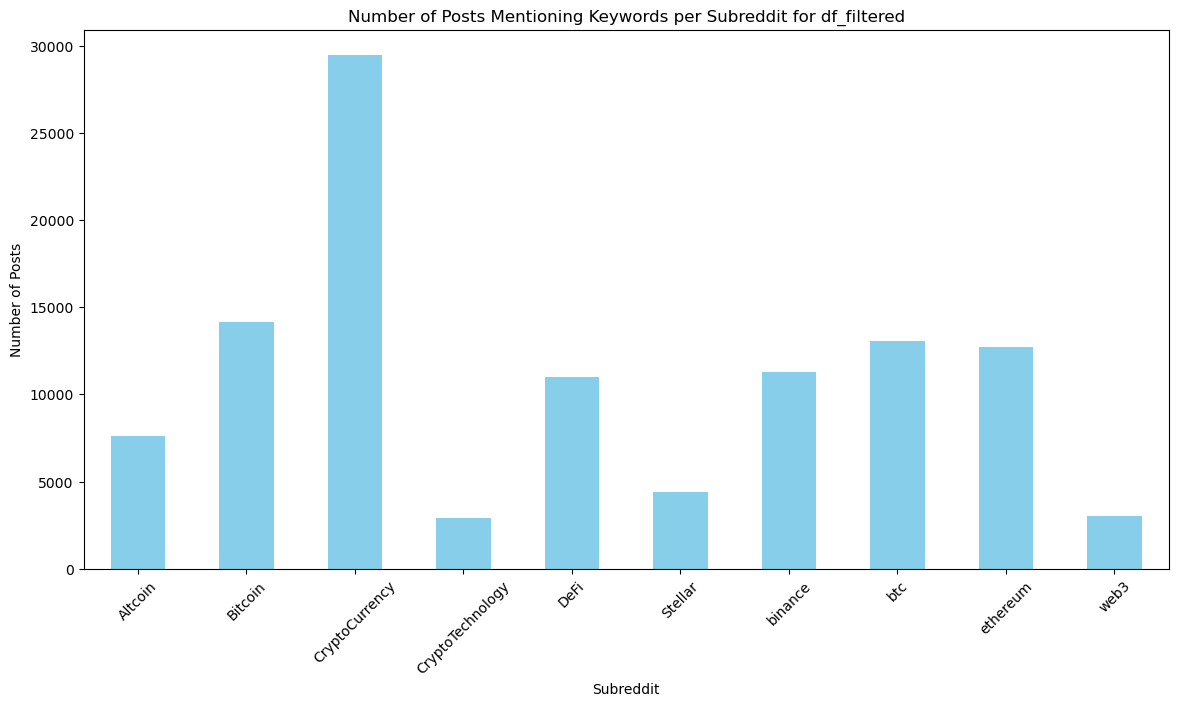

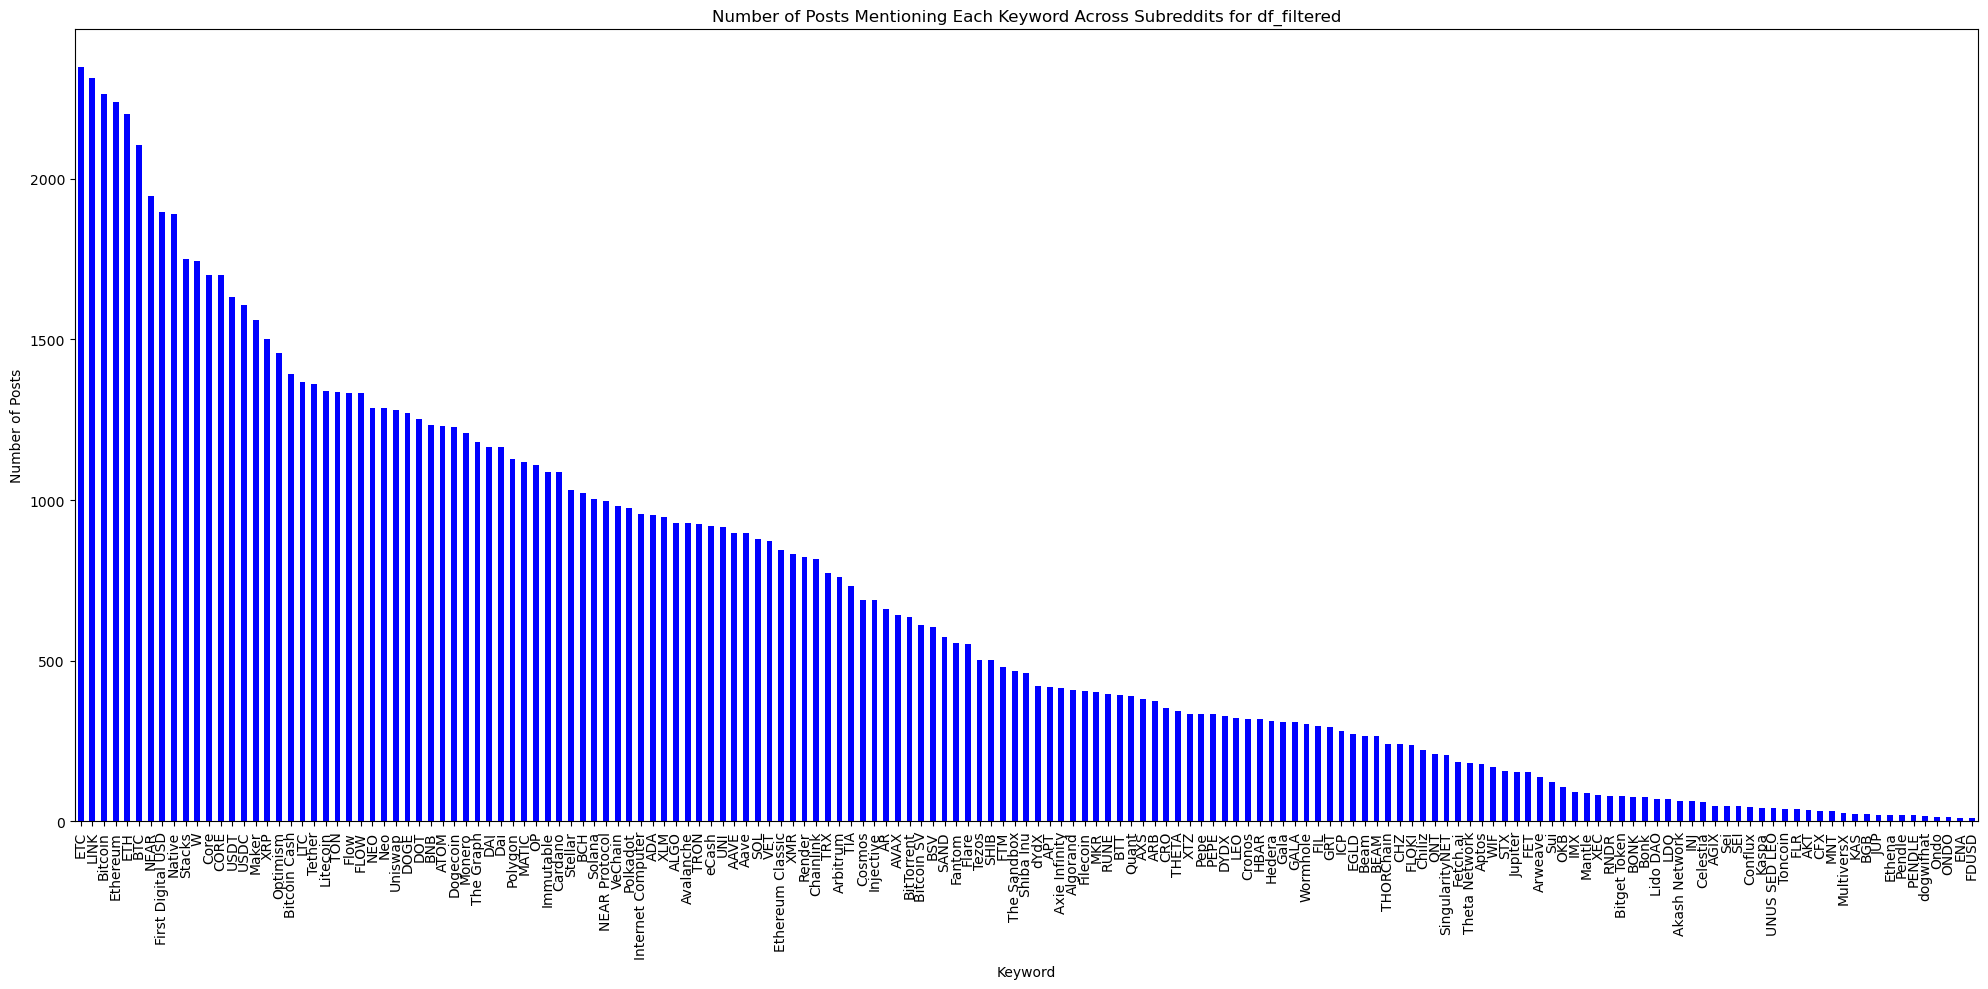

In [33]:
# Plot the number of posts per subreddit for df_filtered
post_counts_filtered = df_filtered.groupby('subreddit')['keyword'].count()
post_counts_filtered.plot(kind='bar', figsize=(14, 7), color='skyblue')
plt.title('Number of Posts Mentioning Keywords per Subreddit for df_filtered')
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()

# Plot the number of posts for each keyword in df_filtered
keyword_counts_filtered = df_filtered.groupby('keyword').size().sort_values(ascending=False)
keyword_counts_filtered.plot(kind='bar', figsize=(20, 10), color='blue')
plt.title('Number of Posts Mentioning Each Keyword Across Subreddits for df_filtered')
plt.xlabel('Keyword')
plt.ylabel('Number of Posts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

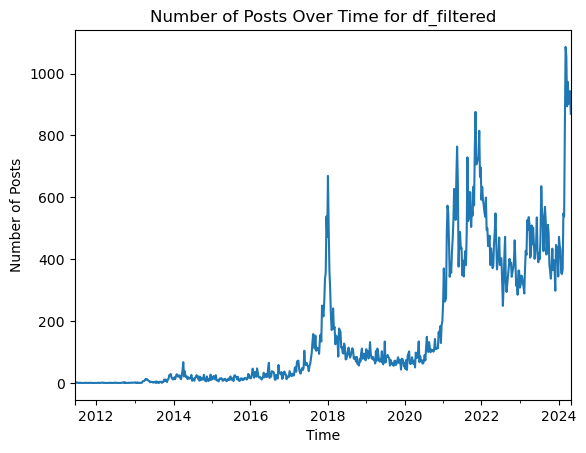

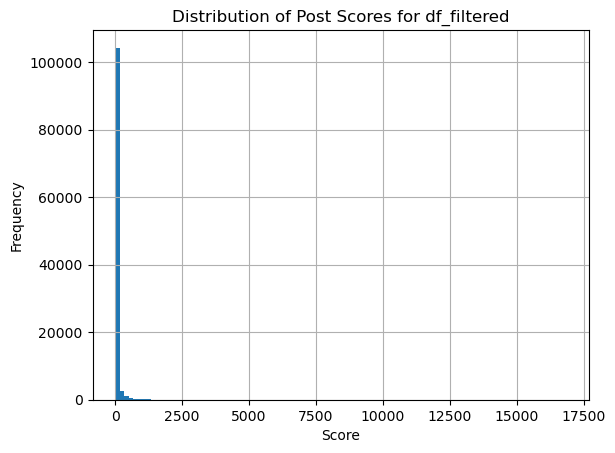

In [39]:

# Assuming df_filtered is already defined and has a 'time_posted' column with string dates
# Convert 'time_posted' to datetime if it's not already, using .loc to avoid SettingWithCopyWarning
df_filtered.loc[:, 'time_posted'] = pd.to_datetime(df_filtered['time_posted'])

# Time Series Plot of posts over time for df_filtered
df_filtered.set_index('time_posted').resample('W')['keyword'].count().plot()
plt.title('Number of Posts Over Time for df_filtered')
plt.xlabel('Time')
plt.ylabel('Number of Posts')
plt.show()

# Histogram of post scores for df_filtered
df_filtered['score'].hist(bins=100)
plt.title('Distribution of Post Scores for df_filtered')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

C:\Users\walid\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


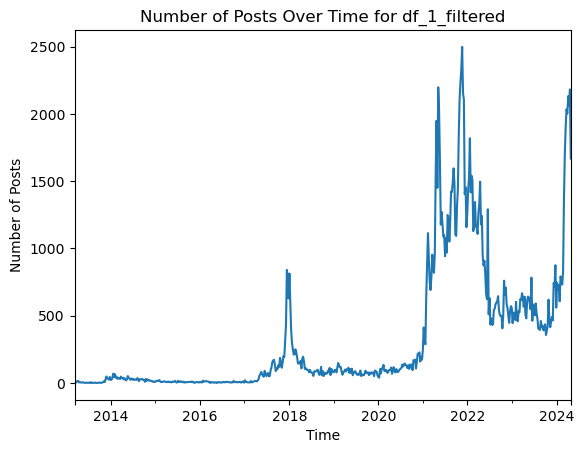

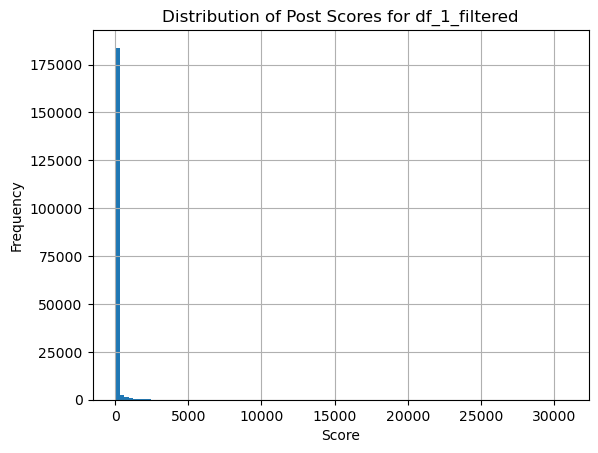

In [38]:
df_1_filtered.loc[:, 'time_posted'] = pd.to_datetime(df_1_filtered['time_posted'])

# Time Series Plot of posts over time for df_1_filtered
df_1_filtered.set_index('time_posted').resample('W')['keyword'].count().plot()
plt.title('Number of Posts Over Time for df_1_filtered')
plt.xlabel('Time')
plt.ylabel('Number of Posts')
plt.show()

# Histogram of post scores for df_1_filtered
df_1_filtered['score'].hist(bins=100)
plt.title('Distribution of Post Scores for df_1_filtered')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()